In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df= pd.read_excel('/Users/carlafarraj/Documents/amazon sales/Amazon Sale Report.xlsx')

In [4]:
df.head()

,index,Order ID,DateN,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,0,INR,647.62,MUMBAI,MAHARASHTRA,400081,IN,NO PROMOTION ID,False,Easy Ship
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,1,INR,406.00,BENGALURU,KARNATAKA,560085,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,Amazon
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008,IN,NO PROMOTION ID,False,Easy Ship
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,1,INR,574.00,CHENNAI,TAMIL NADU,600073,IN,NO PROMOTION ID,False,Amazon


In [5]:
df.shape

(128975, 23)

In [6]:
df.columns

Index(['index', 'Order ID', 'DateN', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               128975 non-null  int64         
 1   Order ID            128975 non-null  object        
 2   DateN               128975 non-null  datetime64[ns]
 3   Status              128975 non-null  object        
 4   Fulfilment          128975 non-null  object        
 5   Sales Channel       128975 non-null  object        
 6   ship-service-level  128975 non-null  object        
 7   Style               128975 non-null  object        
 8   SKU                 128975 non-null  object        
 9   Category            128975 non-null  object        
 10  Size                128975 non-null  object        
 11  ASIN                128975 non-null  object        
 12  Courier Status      128975 non-null  object        
 13  Qty                 128975 no

In [8]:
df.isnull().sum()

index                 0
Order ID              0
DateN                 0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
promotion-ids         0
B2B                   0
fulfilled-by          0
dtype: int64

In [9]:
df.describe()

,index,Qty,Amount,ship-postal-code
count,128975.000000,128975.000000,128975.000000,128975.000000
mean,64487.000000,0.904431,609.363662,463847.524466
std,37232.019822,0.313354,313.347147,191596.021199
min,0.000000,0.000000,0.000000,0.000000
25%,32243.500000,1.000000,413.000000,382421.000000
50%,64487.000000,1.000000,583.000000,500033.000000
75%,96730.500000,1.000000,771.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


In [12]:
df['DateN'].min()

Timestamp('2022-03-31 00:00:00')

In [13]:
df['DateN'].max()

Timestamp('2022-06-29 00:00:00')

In [55]:
df_trend = df.groupby('DateN').sum(numeric_only=True)['Amount'].reset_index()
df_trend[30:50]

,DateN,Amount
30,2022-04-30,969634.43
31,2022-05-01,1079957.52
32,2022-05-02,1172327.06
33,2022-05-03,1190672.59
34,2022-05-04,1209364.17
35,2022-05-05,894704.17
36,2022-05-06,909530.13
37,2022-05-07,911693.76
38,2022-05-08,902173.06
39,2022-05-09,810945.89


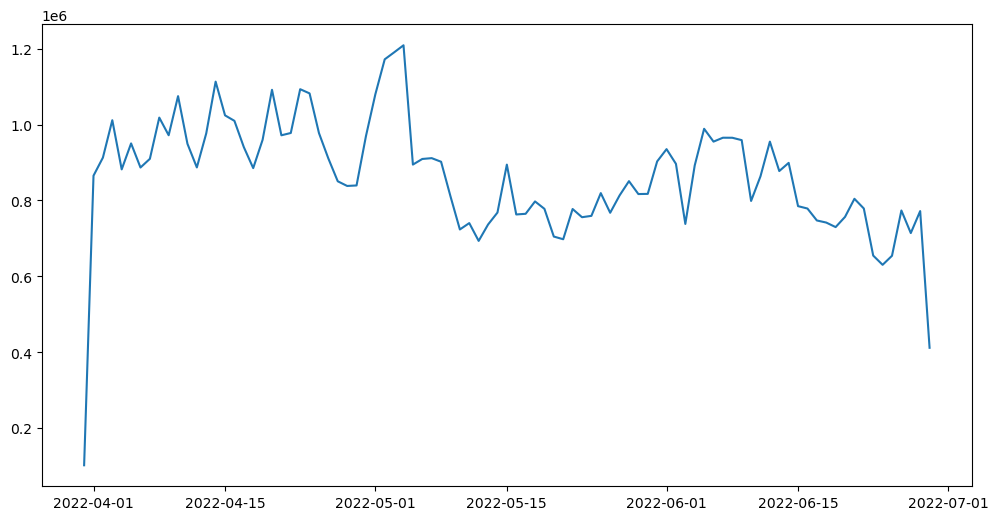

In [86]:
plt.figure(figsize=(12,6))
plt.plot(df_trend['DateN'], df_trend['Amount'])


In [35]:
df['Amount'].sum()

78592678.29999998

In [45]:
df_top=pd.DataFrame(df.groupby('Style').sum(numeric_only=True)['Amount'].reset_index())
df_top

,Style,Amount
0,AN201,1289.00
1,AN202,1900.00
2,AN203,301.00
3,AN204,3164.01
4,AN205,1927.00
...,...,...
1372,SET445,1399.00
1373,SET446,1449.00
1374,SET449,2898.00
1375,SET461,2577.00


In [48]:
Top_Ten_Prod=df_top.sort_values('Amount',ascending=False)

In [49]:
Top_Ten_Prod[:10]

,Style,Amount
863,JNE3797,2933482.00
302,J0230,1944948.48
1240,SET268,1303923.56
373,J0341,1275322.87
111,J0003,981973.75
555,JNE3405,846822.36
116,J0008,819169.96
1308,SET345,723402.79
1287,SET324,720096.82
1250,SET278,719791.48


In [51]:
valid_orders = df[df['Status'].isin(['Shipped', 'Shipped-Delivered to buyer'])]
valid_orders

,index,Order ID,DateN,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,1,INR,329.0,NAVI MUMBAI,MAHARASHTRA,410210,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,Amazon
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,1,INR,574.0,CHENNAI,TAMIL NADU,600073,IN,NO PROMOTION ID,False,Amazon
5,5,404-1490984-4578765,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,SET264,SET264-KR-NP-XL,Set,...,1,INR,824.0,GHAZIABAD,UTTAR PRADESH,201102,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Amazon
6,6,408-5748499-6859555,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,J0095,J0095-SET-L,Set,...,1,INR,653.0,CHANDIGARH,CHANDIGARH,160036,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Amazon
9,9,402-4393761-0311520,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3461,JNE3461-KR-XXL,kurta,...,1,INR,363.0,Chennai,TAMIL NADU,600041,IN,NO PROMOTION ID,False,Amazon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,1,INR,517.0,HYDERABAD,TELANGANA,500013,IN,NO PROMOTION ID,False,Amazon
128971,128971,402-9551604-7544318,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,1,INR,999.0,GURUGRAM,HARYANA,122004,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Amazon
128972,128972,407-9547469-3152358,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,1,INR,690.0,HYDERABAD,TELANGANA,500049,IN,NO PROMOTION ID,False,Amazon
128973,128973,402-6184140-0545956,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,1,INR,1199.0,Halol,Gujarat,389350,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Amazon


In [53]:
num_valid_orders = len(valid_orders)
num_valid_orders

77804

In [59]:
df_prd=pd.DataFrame(df.groupby('Style').sum(numeric_only=True)['Qty'].reset_index())
df_prd

,Style,Qty
0,AN201,5
1,AN202,7
2,AN203,1
3,AN204,7
4,AN205,7
...,...,...
1372,SET445,1
1373,SET446,1
1374,SET449,2
1375,SET461,3


In [66]:
Prod_qty=df_prd.sort_values('Qty',ascending=False)
Prod_qty[:10]

,Style,Qty
863,JNE3797,3692
555,JNE3405,2067
1240,SET268,1731
302,J0230,1710
373,J0341,1471
111,J0003,1390
1287,SET324,1152
1308,SET345,1134
534,JNE3373,1070
549,JNE3399,971


In [69]:
City_sales=valid_orders.groupby(['ship-city','ship-state'])['Amount'].sum().reset_index()
City_sales

,ship-city,ship-state,Amount
0,1,UTTARAKHAND,533.0
1,"(Via Cuncolim)Quepem,South Goa",GOA,1163.0
2,",HYDERABAD",TELANGANA,563.0
3,",raibarely road faizabad (Ayodhya)",UTTAR PRADESH,1122.0
4,..katra,JAMMU & KASHMIR,641.0
...,...,...,...
6948,wardha,MAHARASHTRA,1369.0
6949,wazirganj,UTTAR PRADESH,1186.0
6950,west bengal,WEST BENGAL,335.0
6951,yavatmal,MAHARASHTRA,735.0


In [73]:
top_cities = City_sales.sort_values(by='Amount', ascending=False)
top_cities[:10]

,ship-city,ship-state,Amount
614,BENGALURU,KARNATAKA,4723666.0
2304,HYDERABAD,TELANGANA,3250847.0
3754,MUMBAI,MAHARASHTRA,2437985.0
4189,NEW DELHI,DELHI,2345059.0
1155,CHENNAI,TAMIL NADU,2074972.0
4821,PUNE,MAHARASHTRA,1535676.0
2957,KOLKATA,WEST BENGAL,943375.0
2076,GURUGRAM,HARYANA,850907.0
5915,THANE,MAHARASHTRA,671973.0
4249,NOIDA,UTTAR PRADESH,605745.0


In [75]:
City_orders=valid_orders.groupby(['ship-city','ship-state'])['Qty'].sum().reset_index()
City_orders

,ship-city,ship-state,Qty
0,1,UTTARAKHAND,1
1,"(Via Cuncolim)Quepem,South Goa",GOA,1
2,",HYDERABAD",TELANGANA,1
3,",raibarely road faizabad (Ayodhya)",UTTAR PRADESH,1
4,..katra,JAMMU & KASHMIR,1
...,...,...,...
6948,wardha,MAHARASHTRA,2
6949,wazirganj,UTTAR PRADESH,1
6950,west bengal,WEST BENGAL,1
6951,yavatmal,MAHARASHTRA,1


In [79]:
Top_cities_orders=City_orders.sort_values(by='Qty', ascending=False)
Top_cities_orders[:10]

,ship-city,ship-state,Qty
614,BENGALURU,KARNATAKA,7339
2304,HYDERABAD,TELANGANA,5020
3754,MUMBAI,MAHARASHTRA,3839
4189,NEW DELHI,DELHI,3532
1155,CHENNAI,TAMIL NADU,3469
4821,PUNE,MAHARASHTRA,2405
2957,KOLKATA,WEST BENGAL,1501
2076,GURUGRAM,HARYANA,1237
5915,THANE,MAHARASHTRA,1063
4249,NOIDA,UTTAR PRADESH,883


In [105]:
Unvalid_orders=df[df['Status'].isin(['Cancelled'])]
Cancelled_orders=Unvalid_orders.groupby(['DateN'])

Cancelled_orders_count = Cancelled_orders.size().reset_index()

Cancelled_orders_count[30:50]


,DateN,0
30,2022-04-30,240
31,2022-05-01,234
32,2022-05-02,318
33,2022-05-03,334
34,2022-05-04,304
35,2022-05-05,218
36,2022-05-06,155
37,2022-05-07,180
38,2022-05-08,227
39,2022-05-09,184


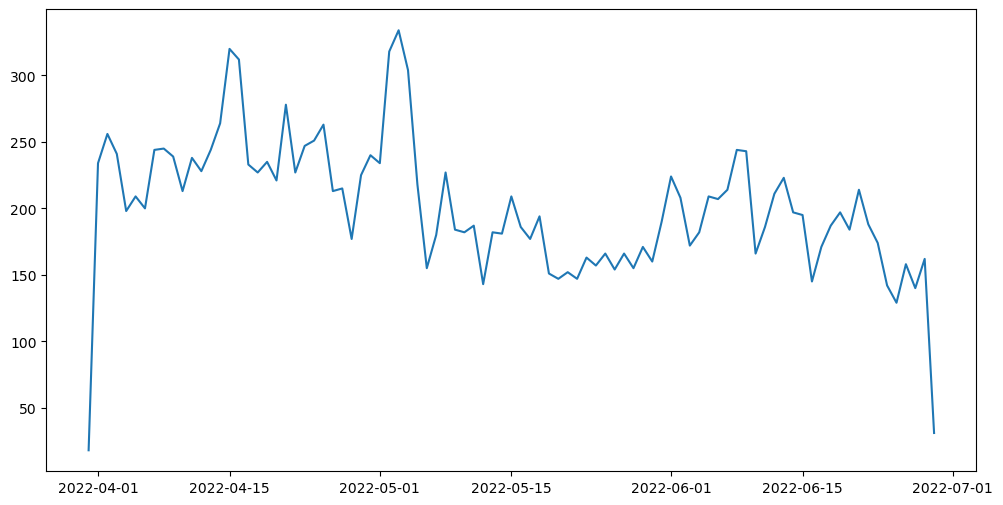

In [100]:
plt.figure(figsize=(12, 6))
plt.plot(Cancelled_orders_count)


In [171]:
b2b_count = df['B2B'].sum()
non_b2b_count = len(df) - b2b_count
total_count = len(df) 

 



In [122]:
percentage_b2b = df['B2B'].value_counts(normalize=True) * 100
percentage_b2b

False    99.324675
True      0.675325
Name: B2B, dtype: float64

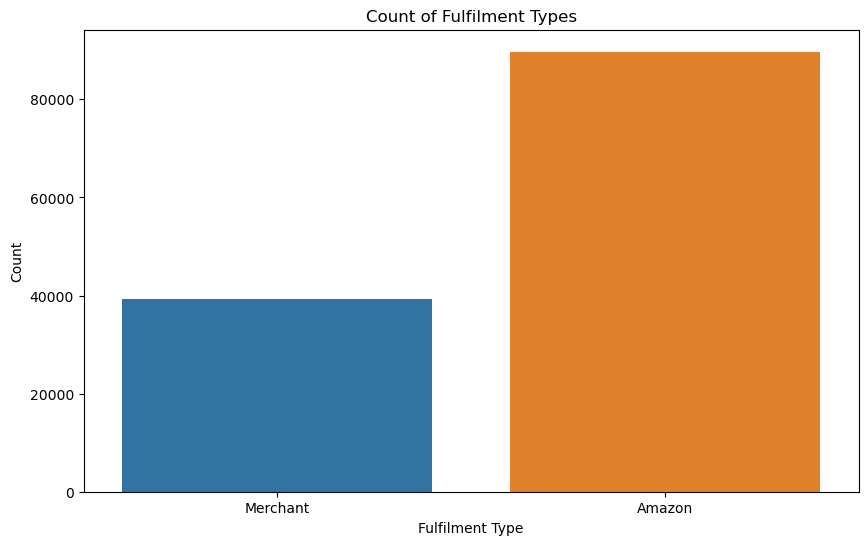

In [117]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Fulfilment')
plt.title('Count of Fulfilment Types')
plt.xlabel('Fulfilment Type')
plt.ylabel('Count')
plt.show()

In [123]:
percentage_Fulfilment = df['Fulfilment'].value_counts(normalize=True) * 100
percentage_Fulfilment

Amazon      69.546811
Merchant    30.453189
Name: Fulfilment, dtype: float64

In [125]:
percentage_SM = df['ship-service-level'].value_counts(normalize=True) * 100
percentage_SM

Expedited    68.707114
Standard     31.292886
Name: ship-service-level, dtype: float64

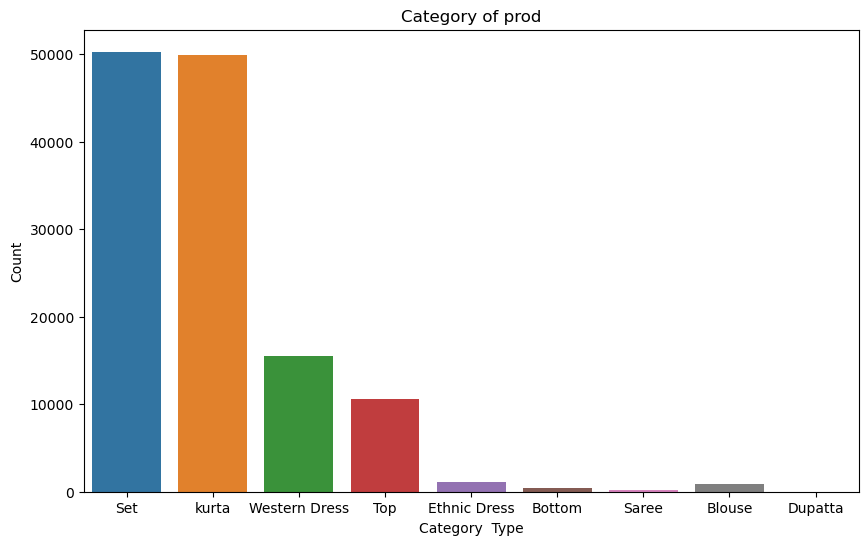

In [126]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Category')
plt.title('Category of prod')
plt.xlabel('Category  Type')
plt.ylabel('Count')
plt.show()

In [128]:
df['Category'].value_counts().reset_index()

,index,Category
0,Set,50284
1,kurta,49877
2,Western Dress,15500
3,Top,10622
4,Ethnic Dress,1159
5,Blouse,926
6,Bottom,440
7,Saree,164
8,Dupatta,3


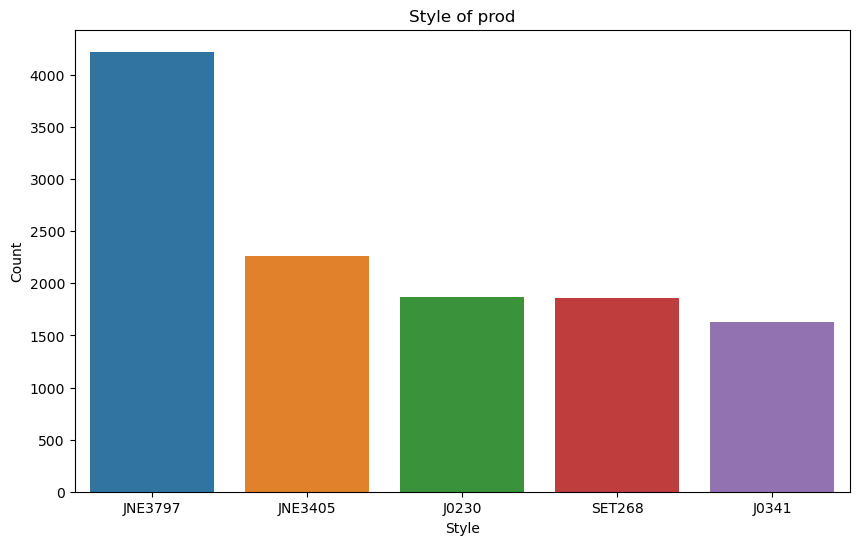

In [163]:
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_df , x='Style',order=top_5_styles)
plt.title('Style of prod')
plt.xlabel('Style')
plt.ylabel('Count')
plt.show()

In [170]:
Style_count=df['Style'].value_counts()
sorted_styles = Style_count.index
top_5_styles=sorted_styles[:5]
filtered_df = df[df['Style'].isin(top_5_styles)]


In [169]:
promotion_id= df['promotion-ids'].value_counts()
promotion_id

NO PROMOTION ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         